<a href="https://colab.research.google.com/github/ChapelFob80930/Principal-Component-Analysis-PCA-and-Linear-Regression-Data-Science-Project-/blob/main/Principal_Component_Analysis_(PCA)_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations


url = "https://raw.githubusercontent.com/ChapelFob80930/Principal-Component-Analysis-PCA-and-Linear-Regression-Data-Science-Project-/refs/heads/main/Tetuan-PC.csv"
dataset = pd.read_csv(url)

In [6]:
print(dataset.head())
print(dataset.shape)
print(dataset.isnull().sum())

             DateTime  Temperature  Humidity  WindSpeed  GenDiffFlows  \
24625  6/21/2017 0:00        21.86      77.0      0.081         0.073   
24626  6/21/2017 0:10        21.91      76.0      0.077         0.077   
24627  6/21/2017 0:20        21.96      75.5      0.081         0.055   
24628  6/21/2017 0:30        21.83      75.1      0.078         0.062   
24629  6/21/2017 0:40        21.60      75.8      0.075         0.048   

       DiffFlows      PCZone1      PCZone2      PCZone3  
24625      0.111  44554.17219  24750.93555  26980.43077  
24626      0.096  44249.00662  24612.47401  26631.87692  
24627      0.096  43753.11258  24339.29314  26141.53846  
24628      0.163  43079.20530  24208.31601  26052.92308  
24629      0.145  42634.17219  23927.65073  25887.50769  
(13248, 9)
DateTime        0
Temperature     0
Humidity        0
WindSpeed       0
GenDiffFlows    0
DiffFlows       0
PCZone1         0
PCZone2         0
PCZone3         0
dtype: int64


In [7]:
dataset.describe()

,Temperature,Humidity,WindSpeed,GenDiffFlows,DiffFlows,PCZone1,PCZone2,PCZone3
count,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000
mean,25.353431,63.239117,4.000284,254.436238,68.161448,35272.400777,22976.430993,23544.040816
std,3.687087,18.150509,1.857605,310.646997,91.721217,7073.784592,5239.586748,7667.598488
min,13.990000,11.340000,0.050000,0.018000,0.019000,18283.684790,10624.116420,8189.908069
25%,22.750000,50.260000,4.904000,0.088000,0.122000,29432.896780,18866.737060,17001.338912
50%,25.140000,65.050000,4.910000,61.540000,35.030000,35604.955750,22900.105600,23051.926500
75%,27.430000,78.300000,4.919000,526.100000,100.200000,40238.628617,27002.361105,28540.920500
max,40.010000,93.800000,4.998000,978.000000,558.700000,52204.395120,37408.860760,47598.326360


In [8]:
corrDataset = dataset.drop('DateTime', axis=1).corr()
print(corrDataset)

              Temperature  Humidity  WindSpeed  GenDiffFlows  DiffFlows  \
Temperature      1.000000 -0.609279   0.177109      0.586910   0.338818   
Humidity        -0.609279  1.000000  -0.019509     -0.445342  -0.147959   
WindSpeed        0.177109 -0.019509   1.000000      0.025463   0.081556   
GenDiffFlows     0.586910 -0.445342   0.025463      1.000000   0.487188   
DiffFlows        0.338818 -0.147959   0.081556      0.487188   1.000000   
PCZone1          0.456112 -0.266929   0.055393      0.159304   0.045006   
PCZone2          0.571742 -0.312297   0.127821      0.189169   0.097874   
PCZone3          0.525966 -0.276645   0.319219      0.018252  -0.014219   

               PCZone1   PCZone2   PCZone3  
Temperature   0.456112  0.571742  0.525966  
Humidity     -0.266929 -0.312297 -0.276645  
WindSpeed     0.055393  0.127821  0.319219  
GenDiffFlows  0.159304  0.189169  0.018252  
DiffFlows     0.045006  0.097874 -0.014219  
PCZone1       1.000000  0.923311  0.759404  
PCZone2  

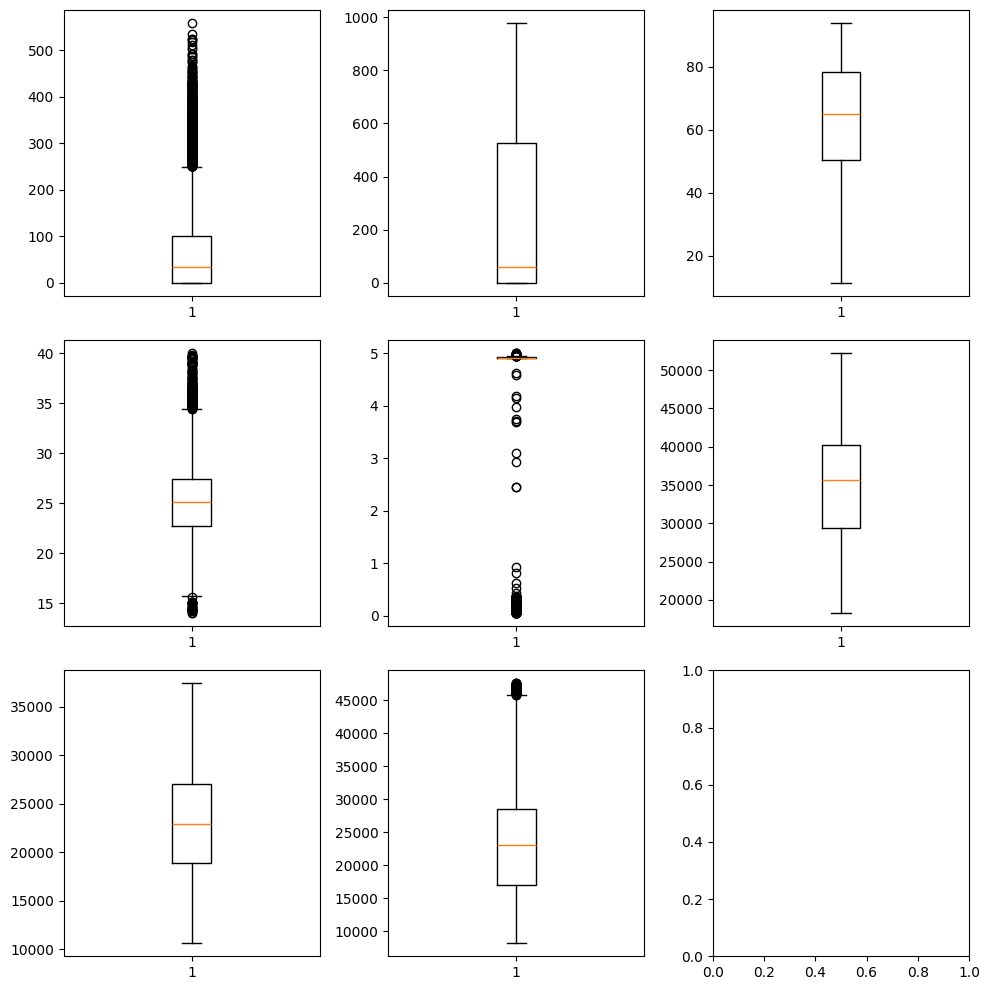

In [9]:
fig,axs = plt.subplots(3,3)
fig.set_size_inches(10, 10)
axs[0,0].boxplot(dataset['DiffFlows'])
axs[0,1].boxplot(dataset['GenDiffFlows'])
axs[0,2].boxplot(dataset['Humidity'])
axs[1,0].boxplot(dataset['Temperature'])
axs[1,1].boxplot(dataset['WindSpeed'])
axs[1,2].boxplot(dataset['PCZone1'])
axs[2,0].boxplot(dataset['PCZone2'])
axs[2,1].boxplot(dataset['PCZone3'])

plt.tight_layout()
plt.show()

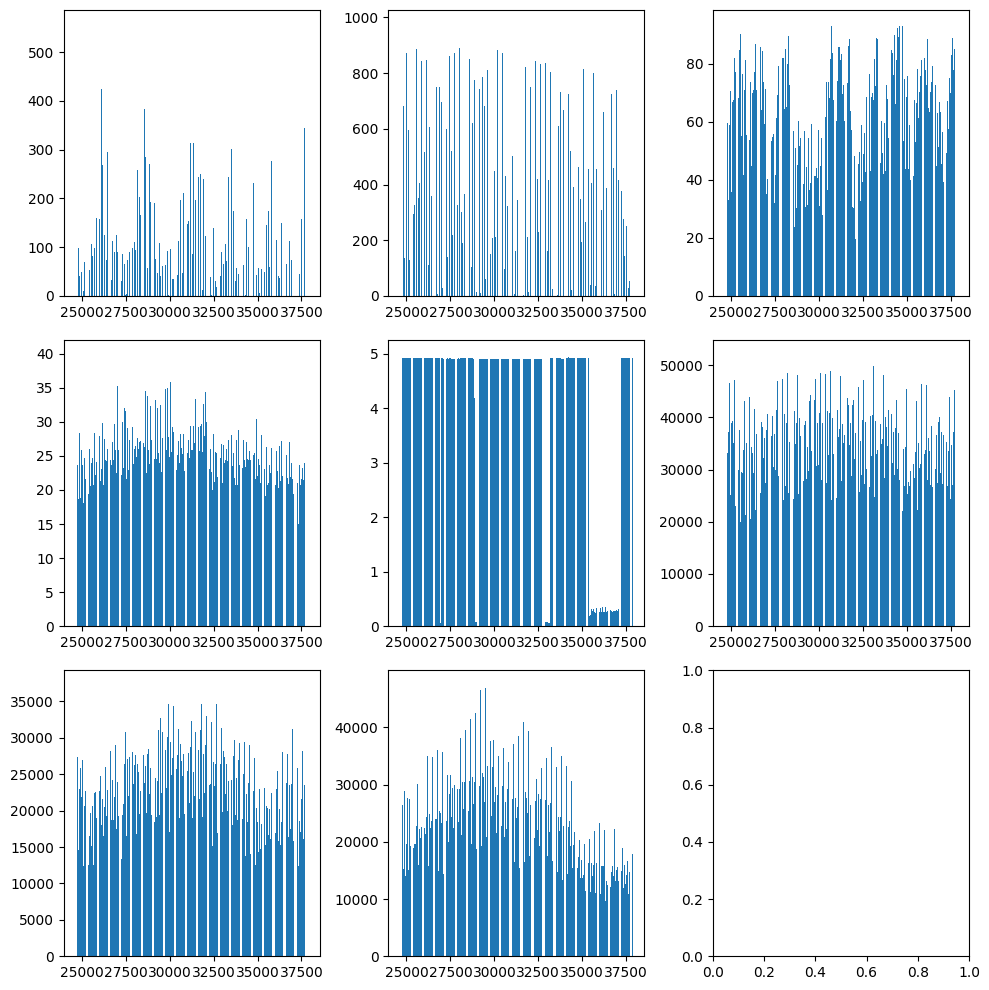

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

axs[0, 0].bar(dataset.index, dataset['DiffFlows'])
axs[0, 1].bar(dataset.index, dataset['GenDiffFlows'])
axs[0, 2].bar(dataset.index, dataset['Humidity'])
axs[1, 0].bar(dataset.index, dataset['Temperature'])
axs[1, 1].bar(dataset.index, dataset['WindSpeed'])
axs[1, 2].bar(dataset.index, dataset['PCZone1'])
axs[2, 0].bar(dataset.index, dataset['PCZone2'])
axs[2, 1].bar(dataset.index, dataset['PCZone3'])


plt.tight_layout()
plt.show()

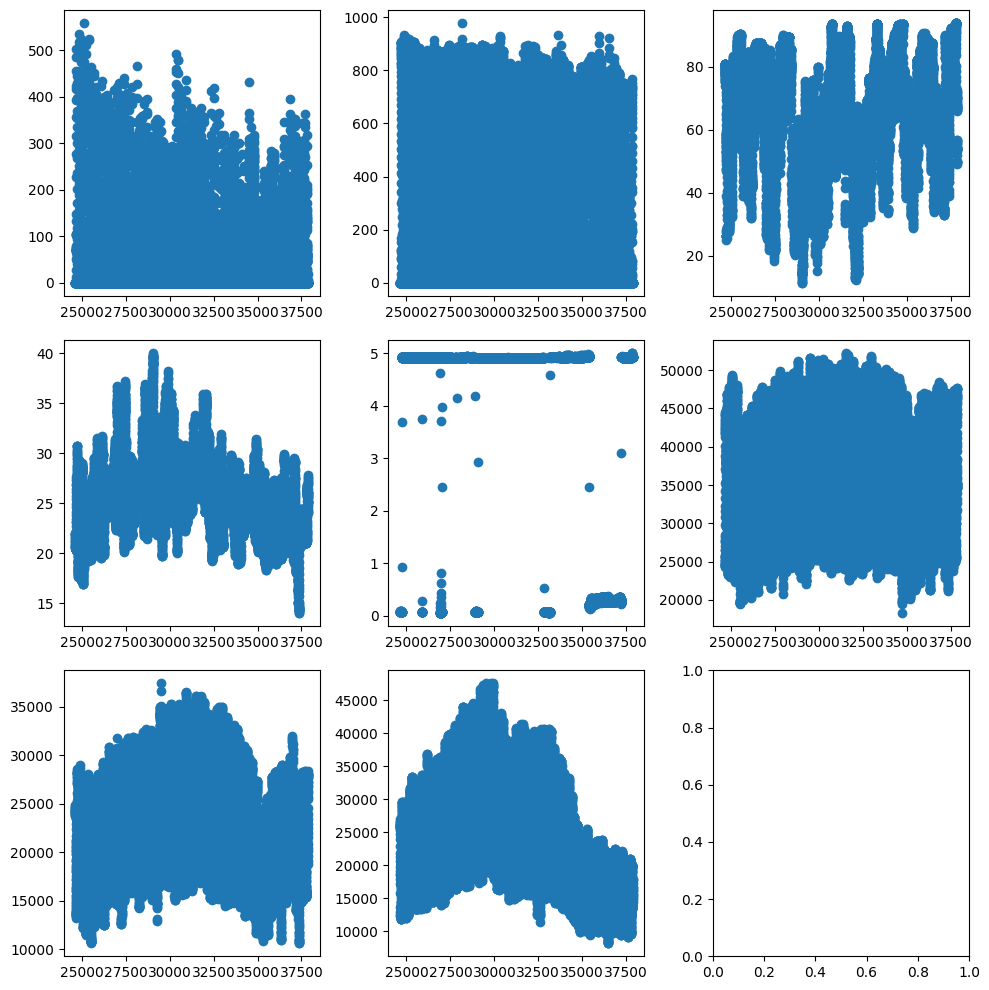

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

axs[0, 0].scatter(dataset.index, dataset['DiffFlows'])
axs[0, 1].scatter(dataset.index, dataset['GenDiffFlows'])
axs[0, 2].scatter(dataset.index, dataset['Humidity'])
axs[1, 0].scatter(dataset.index, dataset['Temperature'])
axs[1, 1].scatter(dataset.index, dataset['WindSpeed'])
axs[1, 2].scatter(dataset.index, dataset['PCZone1'])
axs[2, 0].scatter(dataset.index, dataset['PCZone2'])
axs[2, 1].scatter(dataset.index, dataset['PCZone3'])



plt.tight_layout()
plt.show()

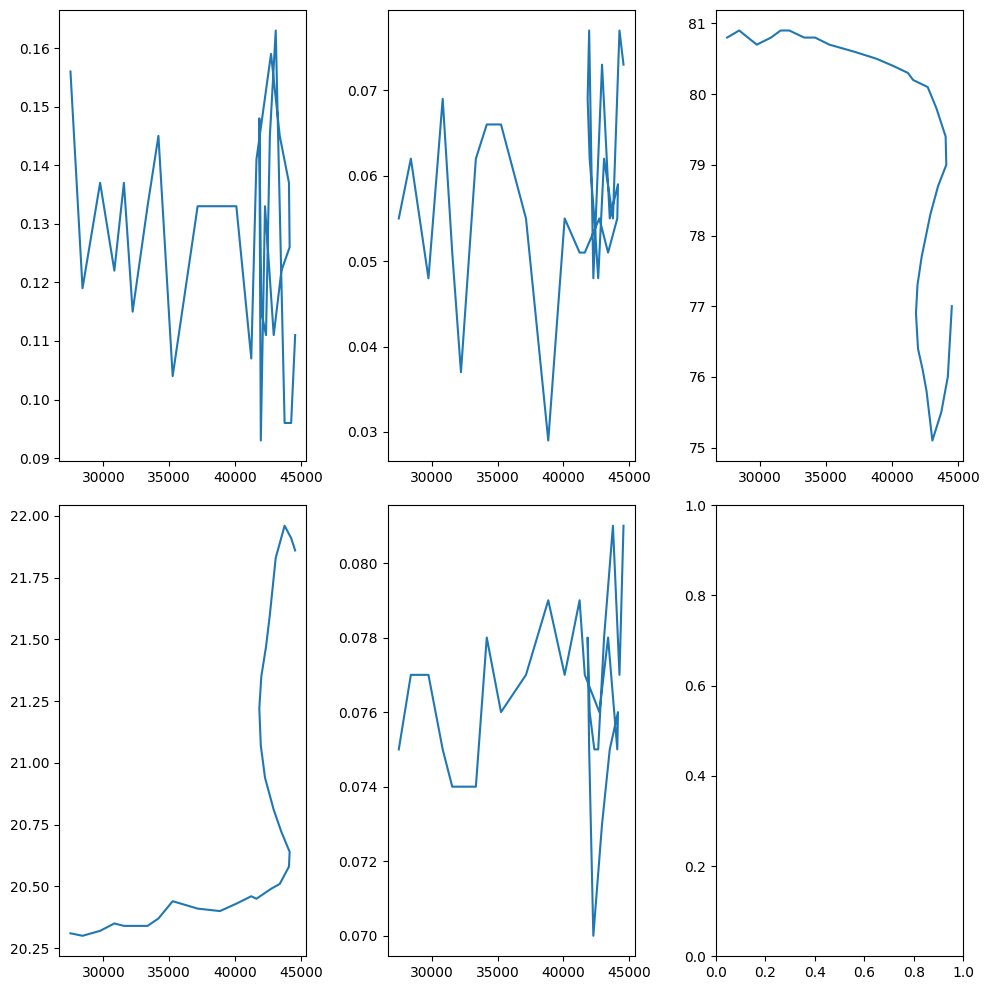

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

axs[0, 0].plot(dataset['PCZone1'][:30], dataset['DiffFlows'][:30],)
axs[0, 1].plot(dataset['PCZone1'][:30], dataset['GenDiffFlows'][:30])
axs[0, 2].plot(dataset['PCZone1'][:30], dataset['Humidity'][:30])
axs[1, 0].plot(dataset['PCZone1'][:30], dataset['Temperature'][:30])
axs[1, 1].plot(dataset['PCZone1'][:30], dataset['WindSpeed'][:30])

plt.tight_layout()
plt.show()

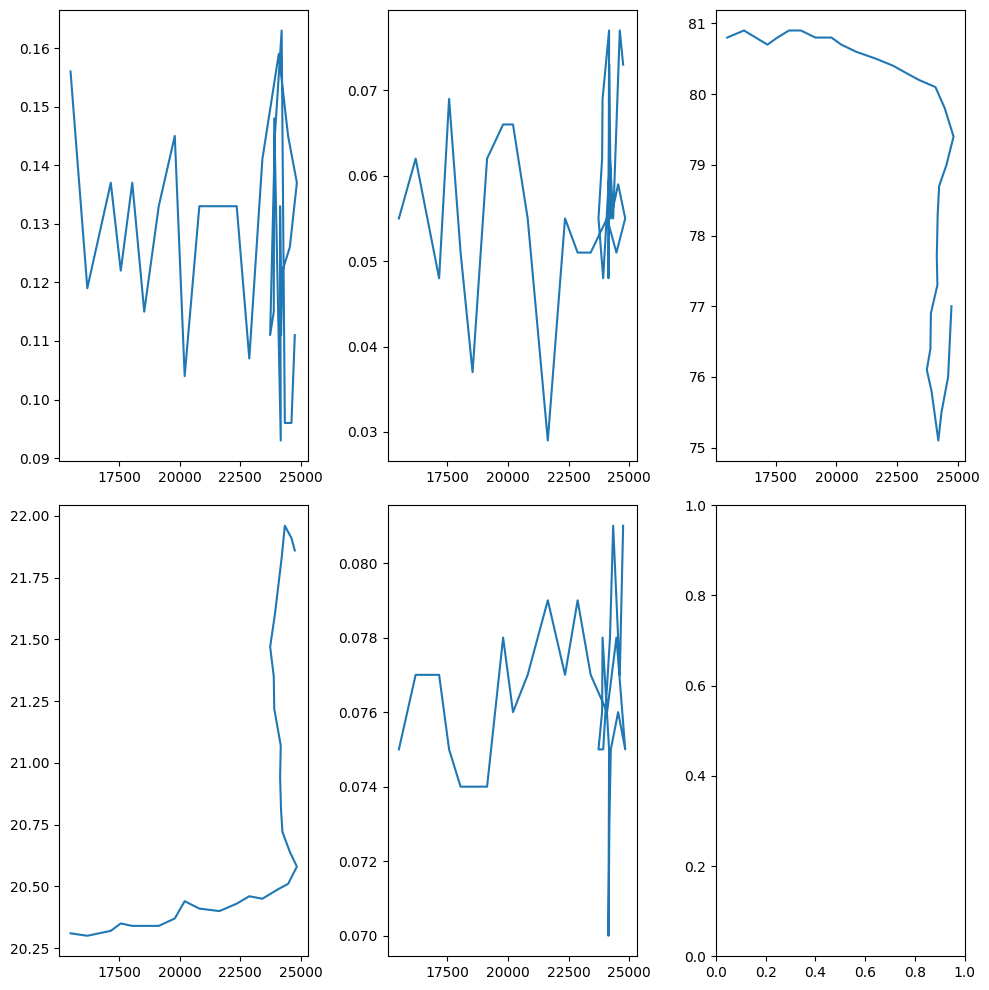

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

axs[0, 0].plot(dataset['PCZone2'][:30], dataset['DiffFlows'][:30],)
axs[0, 1].plot(dataset['PCZone2'][:30], dataset['GenDiffFlows'][:30])
axs[0, 2].plot(dataset['PCZone2'][:30], dataset['Humidity'][:30])
axs[1, 0].plot(dataset['PCZone2'][:30], dataset['Temperature'][:30])
axs[1, 1].plot(dataset['PCZone2'][:30], dataset['WindSpeed'][:30])

plt.tight_layout()
plt.show()

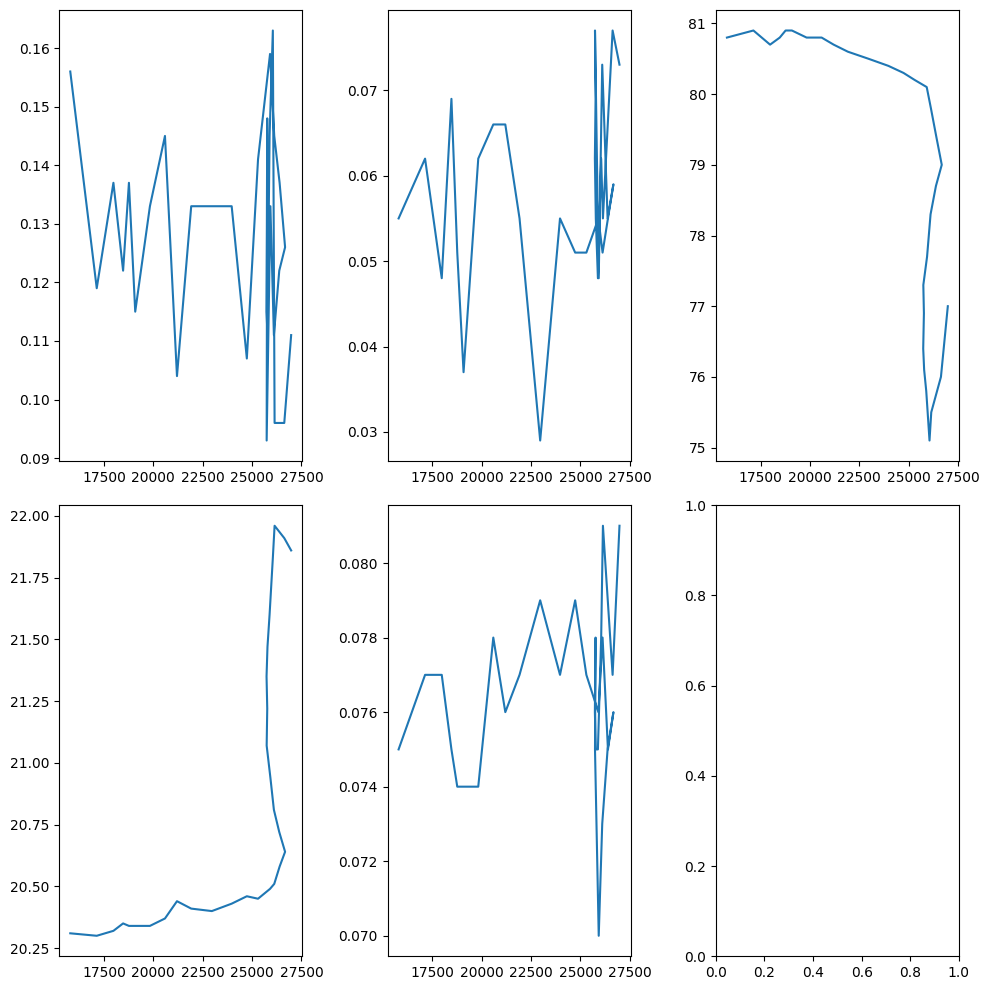

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

axs[0, 0].plot(dataset['PCZone3'][:30], dataset['DiffFlows'][:30],)
axs[0, 1].plot(dataset['PCZone3'][:30], dataset['GenDiffFlows'][:30])
axs[0, 2].plot(dataset['PCZone3'][:30], dataset['Humidity'][:30])
axs[1, 0].plot(dataset['PCZone3'][:30], dataset['Temperature'][:30])
axs[1, 1].plot(dataset['PCZone3'][:30], dataset['WindSpeed'][:30])

plt.tight_layout()
plt.show()

##2.2 Preliminary analysis : descriptive statistics (need to write this in ppt)
  
  1) There are 13248 observations and 9 variables (DateTime, Temperature, Humidity, WindSpeed, GenDiffFlows, DiffFlows, PCZone1, PCZone2, PCZone3)

  2) There are no null values in the dataset

  3) Screenshot of dataset.describe() (i think so not sure)

#2.3 Principal Component Analysis (PCA)

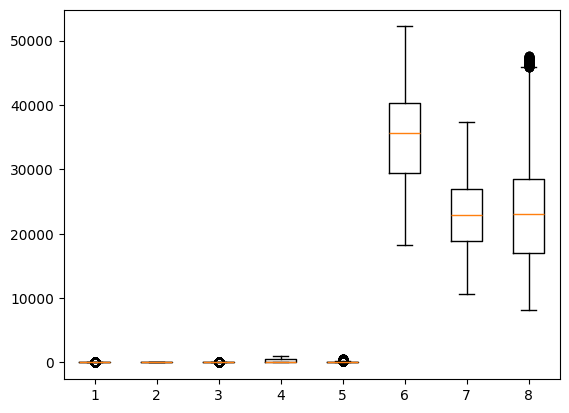

In [15]:
plt.boxplot(dataset.drop('DateTime', axis=1))
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
ds1 = dataset.drop(['DateTime','GenDiffFlows',
       'DiffFlows'], axis=1)
scaler = StandardScaler()
std_data = scaler.fit_transform(ds1)
print(ds1.head)
print(np.var(ds1['Temperature']))
print(np.var(ds1['Humidity']))
print(np.var(ds1['WindSpeed']))
print(np.var(ds1['PCZone1']))
print(np.var(ds1['PCZone2']))
print(np.var(ds1['PCZone3']))

<bound method NDFrame.head of        Temperature  Humidity  WindSpeed      PCZone1      PCZone2      PCZone3
24625        21.86     77.00      0.081  44554.17219  24750.93555  26980.43077
24626        21.91     76.00      0.077  44249.00662  24612.47401  26631.87692
24627        21.96     75.50      0.081  43753.11258  24339.29314  26141.53846
24628        21.83     75.10      0.078  43079.20530  24208.31601  26052.92308
24629        21.60     75.80      0.075  42634.17219  23927.65073  25887.50769
...            ...       ...        ...          ...          ...          ...
37868        24.72     56.42      4.916  35076.10619  20484.82328  15726.74157
37869        24.37     56.82      4.924  34018.40708  20129.31393  15497.28294
37870        24.25     55.89      4.918  33164.60177  19597.92100  15220.75587
37871        24.09     56.45      4.921  32635.75221  19085.23909  14950.11236
37872        24.02     56.62      4.924  31718.23009  18767.15177  14397.05822

[13248 rows x 6 colum

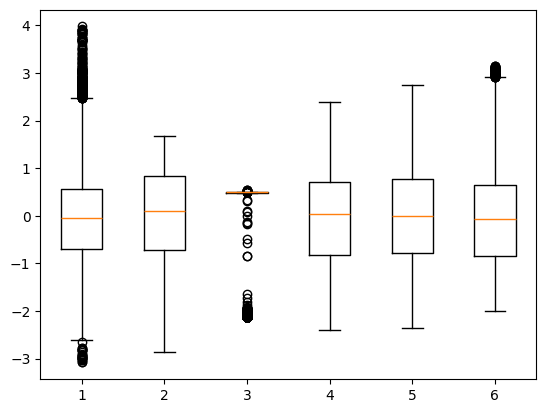

In [17]:
plt.boxplot(std_data)
plt.show()

In [18]:
from sklearn.decomposition import PCA
pca = PCA()

In [19]:
pca.fit(std_data)
results = pca.transform(std_data)

In [20]:
print(pca.explained_variance_)
per_var= np.round(pca.explained_variance_ratio_*100,decimals=1)
print(per_var)
print(np.cumsum(per_var))

[3.32959402 1.07569431 0.99719759 0.33444442 0.20335255 0.06017005]
[55.5 17.9 16.6  5.6  3.4  1. ]
[ 55.5  73.4  90.   95.6  99.  100. ]


In [21]:
loadings = pca.components_.T
print("loadings")
print(ds1.columns)
print(loadings)

loadings
Index(['Temperature', 'Humidity', 'WindSpeed', 'PCZone1', 'PCZone2',
       'PCZone3'],
      dtype='object')
[[ 4.14923060e-01 -3.89919443e-01  2.53024524e-01  7.68088990e-01
  -7.65622974e-02 -1.26324146e-01]
 [-2.90470949e-01  7.07420051e-01 -2.52894599e-01  5.91074521e-01
  -2.50371685e-02 -3.50980205e-02]
 [ 1.39773620e-01  4.61584723e-01  8.30290088e-01 -1.38729597e-01
  -2.42434907e-01  8.14505024e-04]
 [ 4.78141095e-01  1.85672781e-01 -3.51798550e-01 -1.93065720e-01
  -4.67188347e-01 -5.98000976e-01]
 [ 5.10305554e-01  1.60632838e-01 -2.42595704e-01 -8.54004974e-03
  -2.23291258e-01  7.77817934e-01]
 [ 4.84662925e-01  2.72363639e-01 -5.13679879e-03 -6.38514473e-02
   8.16463553e-01 -1.42139964e-01]]


Text(0.5, 1.0, 'Scree plot')

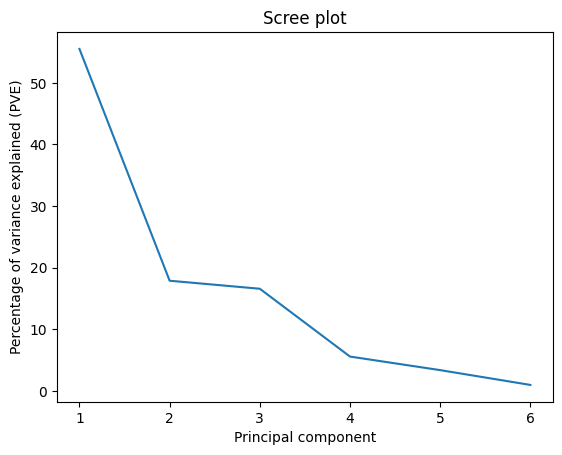

In [22]:
import matplotlib.pyplot as plt
labels =["PC1","PC2","PC3","PC4","PC5","PC6"]
plt.plot([1,2,3,4,5,6,],per_var)
plt.ylabel("Percentage of variance explained (PVE)")
plt.xlabel("Principal component")
plt.title("Scree plot")

Text(0.5, 1.0, 'Scree plot')

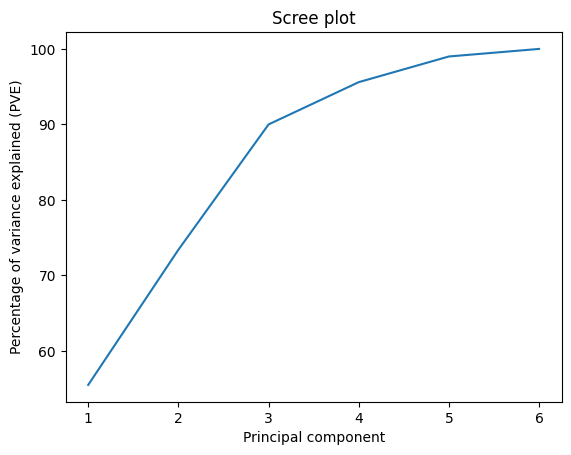

In [23]:
import matplotlib.pyplot as plt
labels =["PC1","PC2","PC3","PC4","PC5","PC6"]
plt.plot([1,2,3,4,5,6,],np.cumsum(per_var))
plt.ylabel("Percentage of variance explained (PVE)")
plt.xlabel("Principal component")
plt.title("Scree plot")

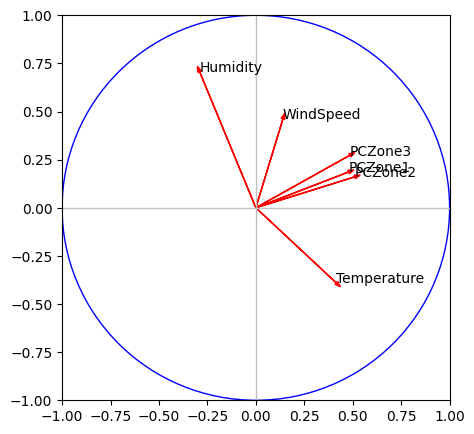

In [24]:
#correlation circle
loadings = pca.components_.T
fig,axis = plt.subplots(figsize=(5,5))
axis.set_xlim(-1,1)
axis.set_ylim(-1,1)
plt.plot([-1,1],[0,0],color="silver",linestyle="-",linewidth=1)
plt.plot([0,0],[-1,1],color="silver",linestyle="-",linewidth=1)
for j in range(0,6):
    plt.arrow(0, 0, loadings[j,0], loadings[j,1],head_width=0.02,width=0.001,color="red")
    plt.annotate(ds1.columns[j],(loadings[j,0], loadings[j,1]))
circle = plt.Circle((0,0),1,color='blue',fill=False)
axis.add_artist(circle)